<a href="https://colab.research.google.com/github/Amenasetheru/Deep-Learning-Projects/blob/main/Recommender_system_with_Tensorflow_using_Amazon_Product_Reviews.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#  Amazon Product Reviews Recommender System with TensorFlow

## Project Overview
Objective: Our goal was to develop a recommender system for Amazon product reviews using TensorFlow to provide personalized product recommendations to users.



## Introduction
Recommender systems play a crucial role in e-commerce, helping users discover products they might like. This project presents a collaborative filtering approach using TensorFlow to build a recommender system based on Amazon product reviews.

## Summary
In this project, we developed an electronic product recommender system using TensorFlow. The goal of this project was to recommend electronic products to users based on their past ratings and preferences. To ensure that only electronic products with substantial ratings are considered to improve recommendation quality, we filtered out electronic products with fewer than 100 ratings. The model uses embeddings for users and electronic products, and a dot product followed by a dense layer to predict ratings.

## Conclusion
We successfully developed an electronic product recommendation system using TensorFlow. The model was trained and evaluated on a dataset of user ratings, and various performance metrics were calculated to assess its accuracy. Future work can involve improving the model by incorporating additional features and experimenting with different architectures.

## 1: Importing Packages

In [ ]:
import pprint
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.regularizers import l2
from sklearn.model_selection import train_test_split
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from tensorflow.keras.layers import StringLookup, Dense, Embedding
from tensorflow.keras.layers import Embedding, Dot, Dense, Dropout
from sklearn.metrics import mean_squared_error, mean_absolute_error

## Dataset

The dataset we use for this project is known as Amazon product reviews. We got it from the Kaggle platform. The dataset contains user ratings for various electronic products. It has fours main columns: user_id, product_id, timestamps and user_rating and it  contains more than 7 millions of reviews.

We are going to use only three of these columns which are:
* user_id,
* product_id
* user_rating

Consequently, we are dropping stimestamps for it does not add any information to the model.

We have also decided to use only to retain for recommenddation electronic products that have received at least 100 ratings. By iltering out electronics products that have less than 100 ratings, the dataset has reduced by almost half.

 Due to the time and cpmputing capacity, we furthermore decided to use only 447178k observations in our project.  

* Number of users: 406257
* Number of products:  13204
* Number of ratings: 447178

In [ ]:
# Creating a path to load the dataset
path = r"/content/drive/MyDrive/ratings_Electronics (1).csv"

In [ ]:
# Reading the dataset
amazon_df = pd.read_csv(path, names=["user_id", "product_id","user_rating","timestamp"])

## 2: Data Exploration and Preprocessing

In [ ]:
# Getting the shape of the dataframe
amazon_df.shape

(7824482, 4)

In [ ]:
# Displaying few rows
amazon_df

,user_id,product_id,user_rating,timestamp
0,AKM1MP6P0OYPR,0132793040,5.0,1365811200
1,A2CX7LUOHB2NDG,0321732944,5.0,1341100800
2,A2NWSAGRHCP8N5,0439886341,1.0,1367193600
3,A2WNBOD3WNDNKT,0439886341,3.0,1374451200
4,A1GI0U4ZRJA8WN,0439886341,1.0,1334707200
...,...,...,...,...
7824477,A2YZI3C9MOHC0L,BT008UKTMW,5.0,1396569600
7824478,A322MDK0M89RHN,BT008UKTMW,5.0,1313366400
7824479,A1MH90R0ADMIK0,BT008UKTMW,4.0,1404172800
7824480,A10M2KEFPEQDHN,BT008UKTMW,4.0,1297555200


In [ ]:
# Dropping the column timestamp
amazon_df.drop("timestamp", axis=1, inplace=True)

In [ ]:
amazon_df

,user_id,product_id,user_rating
0,AKM1MP6P0OYPR,0132793040,5.0
1,A2CX7LUOHB2NDG,0321732944,5.0
2,A2NWSAGRHCP8N5,0439886341,1.0
3,A2WNBOD3WNDNKT,0439886341,3.0
4,A1GI0U4ZRJA8WN,0439886341,1.0
...,...,...,...
7824477,A2YZI3C9MOHC0L,BT008UKTMW,5.0
7824478,A322MDK0M89RHN,BT008UKTMW,5.0
7824479,A1MH90R0ADMIK0,BT008UKTMW,4.0
7824480,A10M2KEFPEQDHN,BT008UKTMW,4.0


In [ ]:
# Filtering out products that have less than 100 ratings
product_counts = amazon_df['product_id'].value_counts()
filtered_amazon_df = amazon_df[amazon_df['product_id'].isin(product_counts[product_counts >= 100].index)]

In [ ]:
filtered_amazon_df.shape

(4471779, 3)

In [ ]:
# Filtering out products that have less than 100 ratings
#filtered_amazon_df = amazon_df.groupby("product_id").filter(lambda x: x['user_rating'].count() >= 100)

In [ ]:
# Sampling a fraction of the data
sampled_amazon_df = filtered_amazon_df.sample(frac=0.1, random_state=27)

In [ ]:
# Displaying the sampled DataFrame shape
sampled_amazon_df.shape

(447178, 3)

In [ ]:
# Checking the datatypes
sampled_amazon_df.dtypes

user_id         object
product_id      object
user_rating    float64
dtype: object

In [ ]:
# Getting infos
sampled_amazon_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 447178 entries, 897343 to 6108252
Data columns (total 3 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   user_id      447178 non-null  object 
 1   product_id   447178 non-null  object 
 2   user_rating  447178 non-null  float64
dtypes: float64(1), object(2)
memory usage: 13.6+ MB


In [ ]:
# Checking the statistical summary on the dataframe
sampled_amazon_df.describe()

,user_rating
count,447178.000000
mean,4.086480
std,1.337378
min,1.000000
25%,4.000000
50%,5.000000
75%,5.000000
max,5.000000


In [ ]:
# Checking for missing values
sampled_amazon_df.isnull().sum()

user_id        0
product_id     0
user_rating    0
dtype: int64

In [ ]:
# Checking for duplicates
sampled_amazon_df.duplicated().sum()

0

In [ ]:
# Extracting unique values for user_id, product_id and user_rating
unique_user_rating = sampled_amazon_df.shape[0]
unique_user_id = sampled_amazon_df["user_id"].unique()
unique_product_id = sampled_amazon_df["product_id"].unique()

In [ ]:
# Displaying unique values in the dataset
print("Total data ")
print("-" * 40)
print(f"\nTotal no of unique ratings: {unique_user_rating}")
print(f"Total No of unique Users: {len(unique_user_id)}")
print(f"Total No of unique products: {len(unique_product_id)}")

Total data 
----------------------------------------

Total no of unique ratings: 447178
Total No of unique Users: 406257
Total No of unique products: 13204


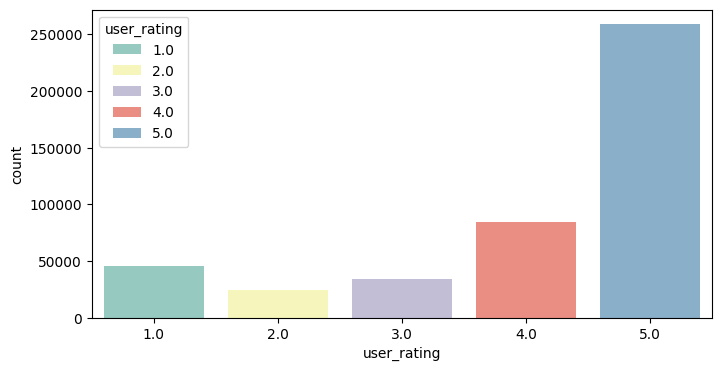

In [ ]:
# Checking the user_rating distribution
plt.figure(figsize=(8, 4))
sns.countplot(x="user_rating", hue="user_rating", palette="Set3", data=sampled_amazon_df);

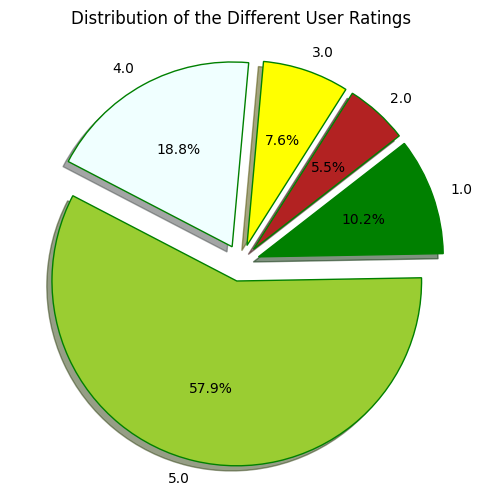

In [ ]:
# Checking the distribution of the different user_rating in percentage
rating_count = sampled_amazon_df["user_rating"].value_counts()
rating_count.sort_index(inplace=True)

# Defining the explode parameter ro match the number of unique rating
explode = (0.1, 0.1, 0.1, 0.1, 0.1)

# Defining colors for the pie chart
colors = ( "green", "firebrick", "yellow", "azure", "yellowgreen")
# Defining the wedge properties
wp = {"linewidth" : 1, "edgecolor" : "green"}

# Creating the pie chart to visualize the distribution of user_rating
fig = plt.figure(figsize=(8, 6))
rating_count.plot(kind="pie", autopct="%1.1f%%", colors=colors, shadow=True, wedgeprops=wp, explode=explode, startangle=1)

plt.title("Distribution of the Different User Ratings")
plt.ylabel("")  # Remove the default y-label
plt.show()

In [ ]:
# Getting the count of rating per category on the user_rating column
sampled_amazon_df["user_rating"].value_counts()

user_rating
5.0    258972
4.0     84048
1.0     45800
3.0     33816
2.0     24542
Name: count, dtype: int64

In [ ]:
# Displaying the number of ratings that are equivalent to 5
num_of_five_star_rating = (sampled_amazon_df["user_rating"] == 5).sum()
print(f"Number of 5-star rating: {num_of_five_star_rating}")

Number of 5-star rating: 258972


In [ ]:
# Displaying the ten highest ratings
top_ten_rating = sampled_amazon_df.nlargest(10, "user_rating",)
top_ten_rating

,user_id,product_id,user_rating
7102736,AFMQH1GIUEJ15,B00BGGDVOO,5.0
2162969,ACSQJ4JLC6AGP,B001N82JP2,5.0
2853583,A3VXNXELAWFFVE,B002TLTIS8,5.0
3597298,A1NWZOELB8FGZL,B003VAGXZC,5.0
7104933,AXNDQAQPN28FP,B00BGGDVOO,5.0
1636370,A3SMA8PLKXS1QH,B0013C22AU,5.0
3800725,A3FUKG6UDKUQ0T,B00426C57O,5.0
2806504,A3VBC39YZGA71W,B002RM08RE,5.0
3099605,A1LSK8VR95UZBS,B0036RDVRI,5.0
229235,A7V2VGPSKWH4W,B00007IFED,5.0


In [ ]:
# Displaying the top ten rating of product_id
print(top_ten_rating[["product_id", "user_rating"]])

         product_id  user_rating
7102736  B00BGGDVOO          5.0
2162969  B001N82JP2          5.0
2853583  B002TLTIS8          5.0
3597298  B003VAGXZC          5.0
7104933  B00BGGDVOO          5.0
1636370  B0013C22AU          5.0
3800725  B00426C57O          5.0
2806504  B002RM08RE          5.0
3099605  B0036RDVRI          5.0
229235   B00007IFED          5.0


In [ ]:
# Counting the ratings for each product
product_id_count = sampled_amazon_df["product_id"].value_counts()
product_id_count

product_id
B0074BW614    1767
B00DR0PDNE    1657
B007WTAJTO    1448
B0019EHU8G    1244
B006GWO5WK    1183
              ... 
B00998P7UW       3
B0026T3TYW       3
B00934CQ56       2
B001T9IVCU       2
B0026RDFV6       2
Name: count, Length: 13204, dtype: int64

In [ ]:
# Ploting the distribution of product_id
#plt.figure(figsize=(30, 8))
#sns.countplot(x="product_id", hue="product_id", data=sampled_amazon_df, palette='Set3')
#plt.title("Distribution of product_id")

#plt.show()

In [ ]:
# Grouping the DataFrame by product Id
product_group_by_id = sampled_amazon_df.groupby("product_id")
# Finding the maximum rating for each product_id group
max_rating_of_product_id_per_group = product_group_by_id["user_rating"].max()
max_rating_of_product_id_per_group

product_id
0972683275    5.0
1400501466    5.0
1400501776    5.0
1400532620    5.0
1400532655    5.0
             ... 
B00K0OBEE2    5.0
B00K4VQZCM    5.0
B00K589F8A    5.0
B00K91DB7Y    5.0
B00KFAGCUM    5.0
Name: user_rating, Length: 13204, dtype: float64

In [ ]:
# Finding the index (beer name) of the most rated beer
most_rated_product_id = product_id_count.idxmax()
# Finding the highest rating for the most rated beer
highest_rating_product_id = sampled_amazon_df[sampled_amazon_df["product_id"] == most_rated_product_id]["user_rating"].max()
# Displaying the product_id with the most rating and the highest rating product
print(f"The product ID with the most ratings is '{most_rated_product_id }' and it has a highest rating of {highest_rating_product_id}.")

The product ID with the most ratings is 'B0074BW614' and it has a highest rating of 5.0.


In [ ]:
# Filtering the DataFrame for the most rated product_id
most_rated_product_id_df = sampled_amazon_df[sampled_amazon_df["product_id"] == most_rated_product_id]
most_rated_product_id_df

,user_id,product_id,user_rating
5596832,A2AEF9AQS1SH6Q,B0074BW614,5.0
5597234,A3V9T29NJ35X1A,B0074BW614,4.0
5610038,A1IFD14T7CXJTP,B0074BW614,5.0
5596139,A6CLE3XEJDZ0O,B0074BW614,1.0
5597966,A1B1WPMI23V8TV,B0074BW614,5.0
...,...,...,...
5605560,AVTQONH26U226,B0074BW614,5.0
5605380,AXKVKHWL41IWO,B0074BW614,3.0
5602753,A2SQCTG34FG8D1,B0074BW614,5.0
5597331,A2FFXKFM3XR1C0,B0074BW614,5.0


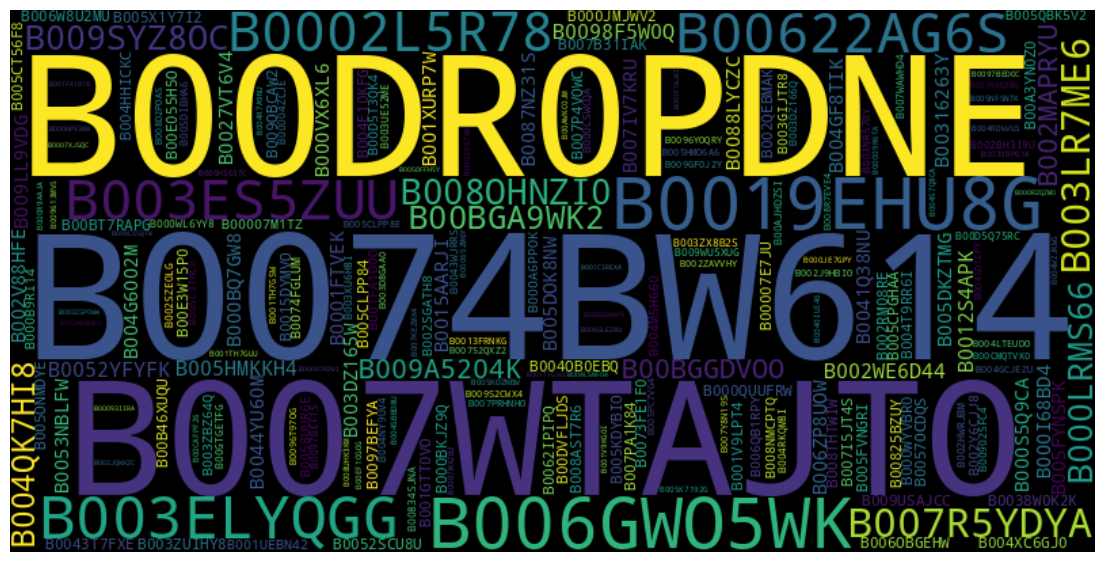

In [ ]:
# Visualizing data with wordcloud
text = ' '.join(sampled_amazon_df['product_id'].astype(str).values)
wordcloud = WordCloud(width=800, height=400).generate(text)
plt.figure(figsize=(14, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [ ]:
# Counting the number of 5-star, 4-star ratings, and total ratings
num_of_5_star_rating = most_rated_product_id_df[most_rated_product_id_df["user_rating"] == 5]["user_rating"].count()
num_of_4_star_rating = most_rated_product_id_df[most_rated_product_id_df['user_rating'] == 4]['user_rating'].count()
total_rating = len(most_rated_product_id_df)

print(f"The product with the most rating is {most_rated_product_id} and it has:")
print(f"{num_of_5_star_rating} rating of 5 stars")
print(f"{num_of_4_star_rating} rating of 4 stars")
print(f"Total Rating: {total_rating}")

The product with the most rating is B0074BW614 and it has:
1224 rating of 5 stars
317 rating of 4 stars
Total Rating: 1767


In [ ]:
# Finding product with at least 100 ratings
product_id_with_100_rating = sampled_amazon_df.groupby("product_id").filter(lambda x: len(x) >= 100)
print("\nproduct_id with at Least 100 Ratings:")
print(len(product_id_with_100_rating["product_id"].unique()))


product_id with at Least 100 Ratings:
689


In [ ]:
# Finding the top-rated product_id for each user
# top_product_id_per_user = amazon_df.groupby("user_id").apply(lambda x: x.nlargest(1,"user_rating"))
# print("Top-Rated Beer for Each User")
# print(top_product_id_per_user[['user_id', 'product_id', 'user_rating']])

In [ ]:
num_of_rated_products_per_user = sampled_amazon_df.groupby(by='user_id')['user_rating'].count().sort_values(ascending=False)

num_of_rated_products_per_user.head()

user_id
A6FIAB28IS79      26
A680RUE1FDO8B     25
A3OXHLG6DIBRW8    22
A3EXWV8FNSSFL6    19
A38RMU1Y5TDP9     16
Name: user_rating, dtype: int64

In [ ]:
#print('\nNum of rated product more than 50 per user : {}\n'.format(sum(num_of_rated_products_per_user >= 100)))

## Building the Recommender Models


## Methodology

A. Model Architecture:
* The model employs a collaborative filtering technique to learn relationships between users and products based on their interactions
(reviews). It uses embeddings for users and electronic products, and a dot product followed by a dense layer to predict ratings. Here's a breakdown of its key components:


Embedding Layers:

StringLookup layers transform user IDs and product IDs into dense vector representations (embeddings). These embeddings capture potential underlying relationships between users and products that might not be evident from the raw IDs alone.
Dot Product:

The user and product embeddings are multiplied using a dot product operation. This captures the interaction strength between a user and a product.
Dense Layer:

A fully connected layer with a single neuron is added on top of the dot product. This layer serves as a non-linear transformation to learn more complex relationships between user-product interactions and predicted ratings.
B. Training Process:

Loss Function: The Mean Absolute Error (MAE) loss function is commonly used in recommender systems, measuring the average difference between predicted and actual ratings.
Optimizer:

An optimizer Adam is employed to adjust model weights during training, minimizing the MAE loss.

In [ ]:
# Splitting the dataset
train_df, test_df = train_test_split(sampled_amazon_df, test_size=0.2, random_state=42)
train_df, validation_df = train_test_split(train_df, test_size=0.2, random_state=42)

In [ ]:
print(train_df.shape, test_df.shape, validation_df.shape)

(286193, 3) (89436, 3) (71549, 3)


In [ ]:
# Defining StringLookup layers
user_lookup = tf.keras.layers.StringLookup(vocabulary=train_df['user_id'].unique(), name='user_lookup')
product_lookup = tf.keras.layers.StringLookup(vocabulary=train_df['product_id'].unique(), name='product_lookup')

In [ ]:
# Getting the vocabulary from the user_lookup
user_vocab = user_lookup.get_vocabulary()

In [ ]:
# Loading user_vocab into a dataframe
user_df = pd.DataFrame(user_vocab, columns=["username"])
user_df.head()

,username
0,[UNK]
1,AZ9GCM6JTTE7F
2,A2IUOTC89TN7ZR
3,A3OKH5G69MS8D9
4,A36MG7BRE38O06


In [ ]:
# Applying StringLookup layers to the data
def preprocess(df):
    user_ids = user_lookup(tf.convert_to_tensor(df['user_id'].values))
    product_ids = product_lookup(tf.convert_to_tensor(df['product_id'].values))
    ratings = tf.convert_to_tensor(df['user_rating'].values, dtype=tf.float32)
    return user_ids, product_ids, ratings

train_user_ids, train_product_ids, train_ratings = preprocess(train_df)
validation_user_ids, validation_product_ids, validation_ratings = preprocess(validation_df)
test_user_ids, test_product_ids, test_ratings = preprocess(test_df)

In [ ]:
class AmazonProductRecommenderModel(tf.keras.Model):
    def __init__(self, num_users, num_products, embedding_dim):
        super().__init__()
        self.user_embedding = tf.keras.layers.Embedding(input_dim=num_users, output_dim=embedding_dim)
        self.product_embedding = tf.keras.layers.Embedding(input_dim=num_products, output_dim=embedding_dim)
        self.dot = tf.keras.layers.Dot(axes=1)
        self.dense = tf.keras.layers.Dense(1)

    def call(self, inputs):
        user_ids, product_ids = inputs
        user_embedding = self.user_embedding(user_ids)
        product_embedding = self.product_embedding(product_ids)
        dot_user_product = self.dot([user_embedding, product_embedding])
        return self.dense(dot_user_product)

In [ ]:
# Defining the number of unique users and products and embedding dimension
num_users = len(user_lookup.get_vocabulary())
num_products = len(product_lookup.get_vocabulary())
embedding_dim = 32

In [ ]:
# Creating the model
model = AmazonProductRecommenderModel(num_users=num_users, num_products=num_products, embedding_dim=embedding_dim)

## Compile the Model

In [ ]:
# Compiling the model
model.compile(optimizer='adam', loss='mean_squared_error')

In [ ]:
# Prepare the datasets
train_dataset = tf.data.Dataset.from_tensor_slices(((train_user_ids, train_product_ids), train_ratings)).batch(32)
validation_dataset = tf.data.Dataset.from_tensor_slices(((validation_user_ids, validation_product_ids), validation_ratings)).batch(32)

## Train the Model

The model is trained on historical data containing user IDs, product IDs, and corresponding ratings.

Evaluation the model's performance is evaluated on a separate test set not used during training. The key metrics used are:

Mean Absolute Error (MAE):
* Measures the average absolute difference between predicted and actual ratings (1.1414 in this example)

Mean Squared Error (MSE):
* Another metric used to assess prediction error, squaring the differences between predicted and actual ratings (1.8809 in this example). Lower values in both metrics indicate better model performance.

In [ ]:
# Training the model
history = model.fit(train_dataset, validation_data=validation_dataset, epochs=2)

Epoch 1/2
8944/8944 [==============================] - 2156s 241ms/step - loss: 4.7468 - val_loss: 1.7967
Epoch 2/2
8944/8944 [==============================] - 2182s 244ms/step - loss: 1.0027 - val_loss: 1.8910


In [ ]:
# Evaluating the model on the test set
test_dataset = tf.data.Dataset.from_tensor_slices(((test_user_ids, test_product_ids), test_ratings)).batch(32)
test_loss = model.evaluate(test_dataset)
print(f'Test Loss: {test_loss}')

2795/2795 [==============================] - 4s 1ms/step - loss: 1.8810
Test Loss: 1.8809840679168701


In [ ]:
# Predicting the ratings using the model
predictions = model.predict(test_dataset)

2795/2795 [==============================] - 3s 1ms/step


In [ ]:
# Converting predictions and actual ratings to NumPy arrays
predictions = np.array(predictions).flatten()
actual_ratings = np.array(test_ratings).flatten()

In [ ]:
# Calculating MAE and MSE
mae = mean_absolute_error(actual_ratings, predictions)
mse = mean_squared_error(actual_ratings, predictions)

In [ ]:
print(f'Model MAE: {mae}')
print(f'Model MSE: {mse}')

Model MAE: 1.141453742980957
Model MSE: 1.8809844255447388


## Results and Discussion

The achieved MAE of 1.1414 and MSE of 1.8809 suggest that the model can generate reasonably accurate rating predictions. The model learns user and product preferences from review data, allowing it to recommend relevant products to users.

### Future Work
Exploration of different embedding techniques:

Consider experimenting with more advanced embedding approaches like word embeddings for reviews or graph embeddings for user-item interactions.

Incorporating additional data:
* Explore including additional product and user attributes (e.g., categories, demographics) to potentially improve recommendations.

Evaluation with ranking metrics:
* While MAE and MSE provide insights into prediction accuracy, consider using ranking metrics like Precision@K or Normalized Discounted Cumulative Gain (NDCG) to assess recommendation quality.

### Deployment:

Develop a web or mobile application to deliver real-time recommendations.
Implement feedback loops to continuously improve the model based on user interactions.

In [ ]:
# Plotting the results for comparison
metrics = ['MAE', 'MSE']
metrics = [mae, mse]

In [ ]:
x = np.arange(len(metrics))  # the label locations
width = 0.35  # the width of the bars

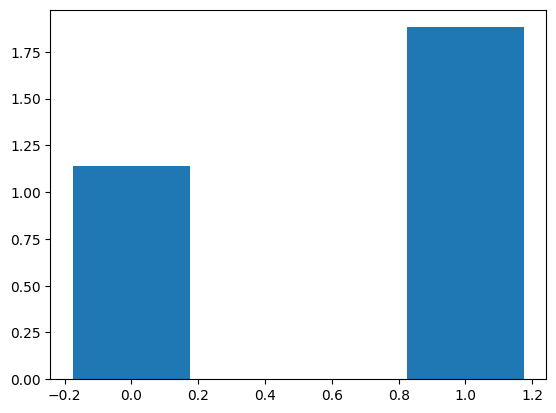

In [ ]:
fig, ax = plt.subplots()
rects1 = ax.bar(x, metrics, width, label='Initial Model')

In [ ]:
# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_xlabel('Metrics')
ax.set_ylabel('Scores')
ax.set_title('MAE and MSE by Model')
ax.set_xticks(x)
ax.set_xticklabels(metrics)
ax.legend()

# Attach a text label above each bar in *rects*, displaying its height.
def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(round(height, 2)),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(rects1)

fig.tight_layout()

plt.show()

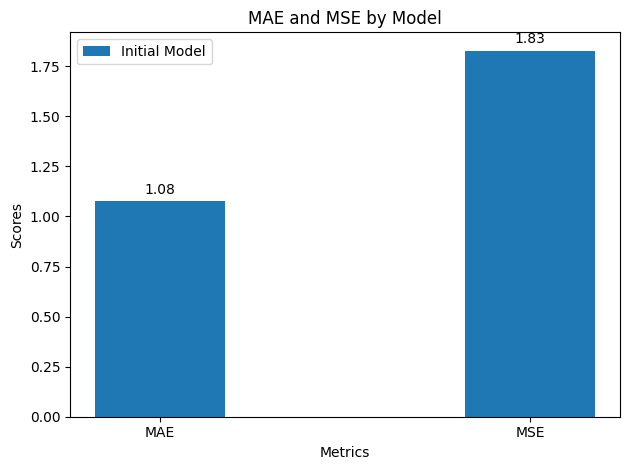

In [ ]:
# Creating a bar chart to visualize two model evaluation metrics: Mean Absolute Error (MAE) and Mean Squared Error (MSE).

#Assigning values to both variables mae and mse
for initial model metrics
mae = 1.0756176710128784
mse = 1.827850341796875

# Preparing data
metrics = ['MAE', 'MSE']
scores = [mae, mse]

# Creating a new figure (fig) and a single subplot (ax) for the bar chart.
fig, ax = plt.subplots()
x = np.arange(len(metrics))
rects = ax.bar(x, scores, 0.35)

# Adding some text for labels, title and custom x-axis tick labels, etc.
ax.set_xlabel('Metrics')
ax.set_ylabel('Scores')
ax.set_title('MAE and MSE by Model')
ax.set_xticks(x)
ax.set_xticklabels(metrics)
ax.legend(['Initial Model'])

# Attaching a text label above each bar in *rects*, displaying its height.
def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(round(height, 2)),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(rects)

# Adjusting the spacing between the chart elements for a cleaner presentation.
fig.tight_layout()
plt.show()


## Saving the Model using TensorFlow SavedModel Format

In [ ]:
# Saving the entire model to a SavedModel format
model.save("initial_model")

## Saving Only the Model Weights

In [ ]:
# Saving only the weights
model.save_weights("initial_model_weights")

## Loading the Entire Model

In [ ]:
# Loading the entire model
loaded_model = tf.keras.models.load_model("initial_model")

## Conclusion
This project successfully developed an electronic product recommendation system using TensorFlow. The model was trained and evaluated on a dataset of user ratings, and various performance metrics were calculated to assess its accuracy. Future work can involve improving the model by incorporating additional features and experimenting with different architectures.